In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from time import time
from sklearn import preprocessing

In [2]:
df = pd.read_csv('data/titanic/train.csv')

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df["male"] = (df.Sex == "male").astype(int)
df["female"] = (df.Sex == "female").astype(int)

In [5]:
df = df[df["Age"].isnull() == False]
df = df[df["Embarked"].isnull() == False]

In [6]:
df["first_class"] = (df.Pclass == 1).astype(int)
df["second_class"] = (df.Pclass == 2).astype(int)
df["third_class"] = (df.Pclass == 3).astype(int)

In [7]:
for x in df.Embarked.unique():
    df[x] = (df.Embarked == x).astype(int)

In [8]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,male,female,first_class,second_class,third_class,S,C,Q
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1,0,0,0,1,1,0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0,1,1,0,0,0,1,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,1,0,0,1,1,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0,1,1,0,0,1,0,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1,0,0,0,1,1,0,0


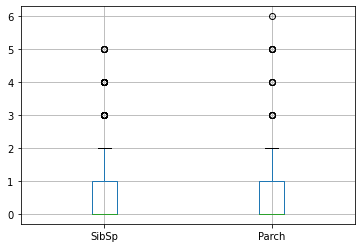

In [9]:
df.boxplot(["SibSp", "Parch"])

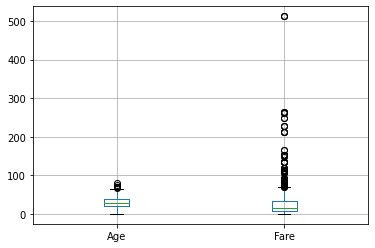

In [10]:
df.boxplot(["Age", "Fare"])

In [11]:
age_scaler = preprocessing.QuantileTransformer(n_quantiles=df["Age"].count())
df["norm_age"] = age_scaler.fit_transform(df["Age"].values.reshape(-1, 1))

In [12]:
sib_sp_scaler = preprocessing.QuantileTransformer(n_quantiles=df["SibSp"].count())
df["norm_sib_sp"] = sib_sp_scaler.fit_transform(df["SibSp"].values.reshape(-1,1))

In [13]:
fare_scaler = preprocessing.QuantileTransformer(n_quantiles=df["Fare"].count())
df["norm_fare"] = fare_scaler.fit_transform(df["Fare"].values.reshape(-1,1))

In [14]:
parch_scaler = preprocessing.QuantileTransformer(n_quantiles=df["Parch"].count())
df["norm_parch"] = parch_scaler.fit_transform(df["Parch"].values.reshape(-1, 1))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f99ae427040>,
      dtype=object)

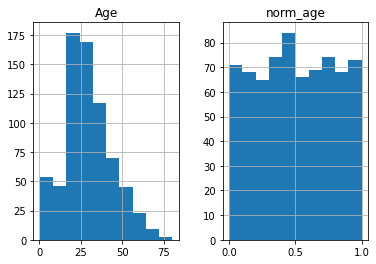

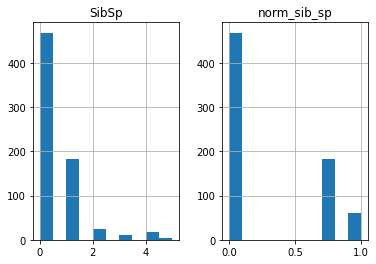

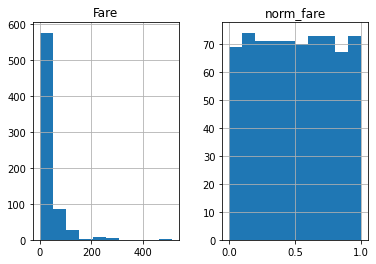

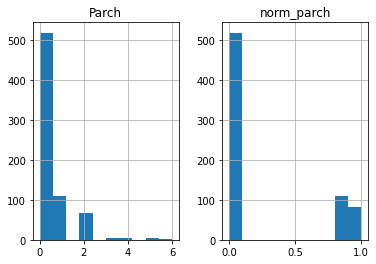

In [15]:
df.hist(["Age", "norm_age"])
df.hist(["SibSp", "norm_sib_sp"])
df.hist(["Fare", "norm_fare"])
df.hist(["Parch", "norm_parch"])

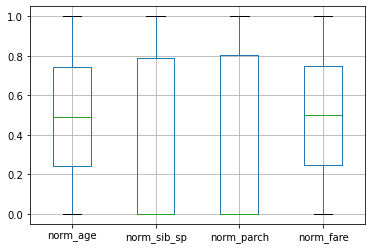

In [16]:
df.boxplot(["norm_age", "norm_sib_sp", "norm_parch", "norm_fare"])

In [17]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,first_class,second_class,third_class,S,C,Q,norm_age,norm_sib_sp,norm_fare,norm_parch
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,...,0,0,1,1,0,0,0.304501,0.787623,0.071027,0.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,...,1,0,0,0,1,0,0.746132,0.787623,0.870605,0.0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,...,0,0,1,1,0,0,0.434599,0.000000,0.213080,0.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,...,1,0,0,1,0,0,0.684951,0.787623,0.828411,0.0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,...,0,0,1,1,0,0,0.684951,0.000000,0.246835,0.0


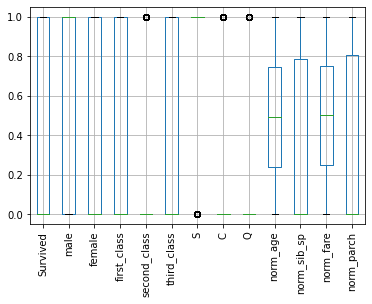

In [18]:
features = ["Survived", "male", "female", "first_class", "second_class", "third_class", "S", "C", "Q", "norm_age", "norm_sib_sp", "norm_fare", "norm_parch"]
df.boxplot(features, rot=90)

In [19]:
df.to_csv("data/cleaned_train.csv", index=False)